In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
transform=transforms.Compose([transforms.ToTensor()])

# Create training set and define training dataloader
train_data = torchvision.datasets.MNIST('data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.MNIST('data', train=False, download=True, transform=transform)


100%|██████████| 9912422/9912422 [04:55<00:00, 33552.29it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 28881/28881 [00:00<00:00, 131092.85it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:49<00:00, 33159.92it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 16049308.14it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [4]:
from torch.utils.data import DataLoader
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

## Explore the Dataset


Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [5]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)

    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))

        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

Dimensions of the training data:
Images shape: (64, 1, 28, 28)
Labels shape: torch.Size([64])
Visualizing a few images:
1


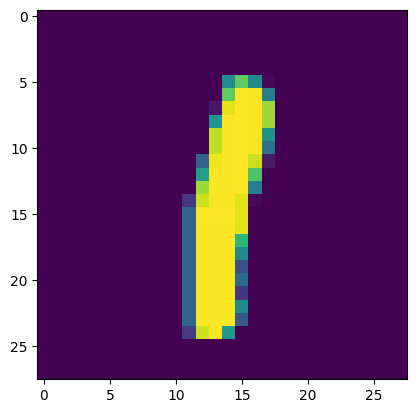

2


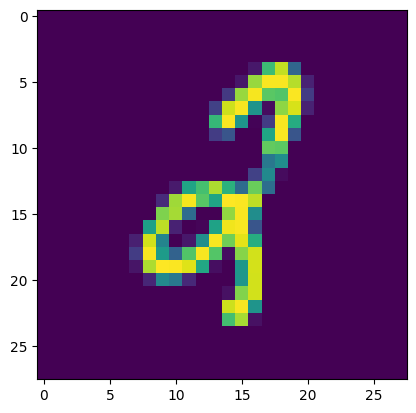

1


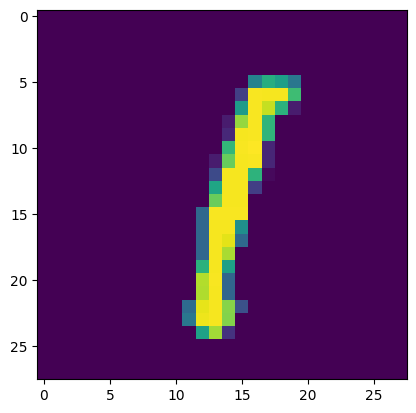

7


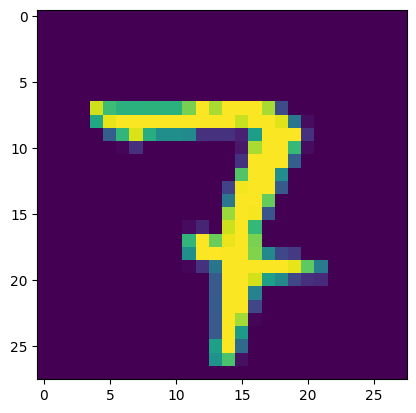

1


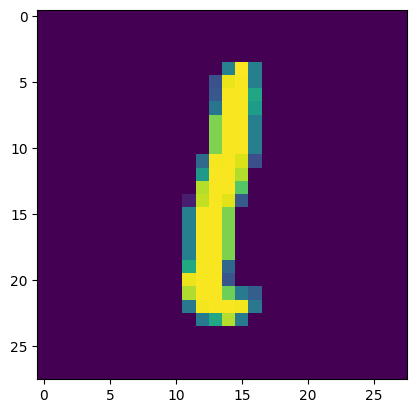

In [8]:
dataiter = iter(train_loader)
images, labels = next(iter(train_loader))
images = images.numpy()

# Print dimensions
print("Dimensions of the training data:")
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)

# Visualize a few images
print("Visualizing a few images:")
show5(train_loader)

In [11]:
len(train_data)

60000

In [12]:
len(test_data)

10000

## **Build your Neural Network**

Using the layers in torch.nn (which has been imported as nn) and the torch.nn.functional module (imported as F), construct a neural network based on the parameters of the dataset. Use any architecture you like.

Note: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only Linear layers, make sure to use the Flatten layer in your network!

In [14]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [15]:
# Instantiate the model
model = NeuralNetwork()

# Specify loss function (Cross Entropy Loss is commonly used for classification tasks)
criterion = nn.CrossEntropyLoss()

# Specify optimizer (Stochastic Gradient Descent with momentum)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

## **Running your Neural Network**

Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. Don't forget to use torch.device() and the .to() method for both your model and your data if you are using GPU!

If you want to print your loss during each epoch, you can use the enumerate function and print the loss after a set number of batches. 250 batches works well for most people!

In [18]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

Epoch [1/5], Batch [250/938], Loss: 1.1562
Epoch [1/5], Batch [500/938], Loss: 0.3819
Epoch [1/5], Batch [750/938], Loss: 0.3069
Epoch [2/5], Batch [250/938], Loss: 0.2275
Epoch [2/5], Batch [500/938], Loss: 0.2021
Epoch [2/5], Batch [750/938], Loss: 0.1890
Epoch [3/5], Batch [250/938], Loss: 0.1458
Epoch [3/5], Batch [500/938], Loss: 0.1322
Epoch [3/5], Batch [750/938], Loss: 0.1318
Epoch [4/5], Batch [250/938], Loss: 0.1045
Epoch [4/5], Batch [500/938], Loss: 0.1067
Epoch [4/5], Batch [750/938], Loss: 0.0987
Epoch [5/5], Batch [250/938], Loss: 0.0850
Epoch [5/5], Batch [500/938], Loss: 0.0869
Epoch [5/5], Batch [750/938], Loss: 0.0820


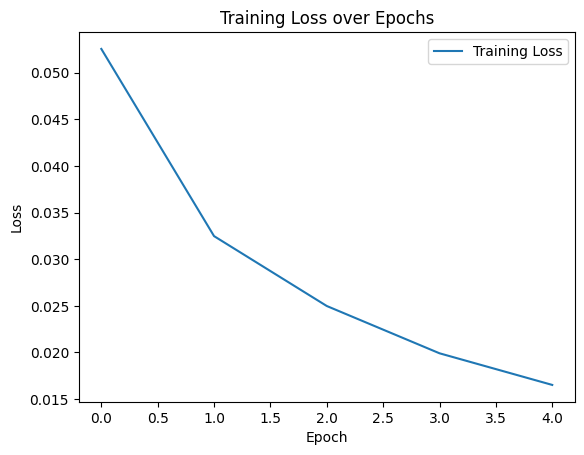

In [19]:
num_epochs = 5
train_losses = []  # List to store training losses

for epoch in range(num_epochs):
    epoch_loss = 0.0

    # Set the model to train mode
    model.train()

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        # Move the inputs and labels to the appropriate device
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Compute the loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Record the batch loss
        epoch_loss += loss.item()

        # Print the loss after every 250 batches
        if i % 250 == 249:
            print(f"Epoch [{epoch+1}/{num_epochs}], Batch [{i+1}/{len(train_loader)}], Loss: {epoch_loss / 250:.4f}")
            epoch_loss = 0.0  # Reset epoch loss

    # Record the average training loss for the epoch
    train_losses.append(epoch_loss / len(train_loader))

# Plot the training loss
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

### **Testing your model**
Using the previously created DataLoader for the test set, compute the percentage of correct predictions using the highest probability prediction.

If your accuracy is over 90%, great work, but see if you can push a bit further! If your accuracy is under 90%, you'll need to make improvements. Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [20]:
# Evaluate the model on the test set
correct = 0
total = 0
model.eval()  # Set the model to evaluation mode

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)  # Move data to the appropriate device
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

In [21]:
# Calculate the accuracy
accuracy = 100 * correct / total
print(f"Accuracy on the test set: {accuracy:.2f}%")

Accuracy on the test set: 97.41%


## improving the model

already the accuracy is above 90% so no need to improve the data

###**Saving the model**

In [22]:
torch.save(model.state_dict(), 'mnist_model.pth')